###  Исходные данные | Подготовка данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/churn.csv')
drop_column = ['Surname','RowNumber']
df_new = df.drop(drop_column, 1)
df_new.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
exit_df = df_new[df_new['Exited'] == 1]
not_exit_df = df_new[df_new['Exited'] == 0]

###  9.1 Каково соотношение ушедших и лояльных клиентов?

In [5]:

df_exited = df_new.groupby(by='Exited', as_index=False).agg('count')
df_exited['Exited'] = df_exited['Exited'].map({0 : ' Лояльные клиенты', 1 : ' Ушедшие клиенты'})
fig = px.pie(df_exited, values='CustomerId', 
             names='Exited', 
             title='Cоотношение ушедших и лояльных клиентов',
             labels={'Exited': 'Статус ', 
                     'CustomerId': 'Количество',
                     }
             
);
            
fig.show()


Исходя из графика можно сделать вывод о том, что каждый пятый клиент уходит из банка. В последующих заданиях мы проведём более детальный анализ.

###  9.2  График, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов

In [43]:
df_balance = df_new[df_new['Balance'] > 2500]

fig1 = px.histogram(
    data_frame=df_balance, 
    x='Balance', 
    histfunc='count',
    title='Распределение баланса пользователей', 
    nbins = 30
)
fig1.show()

fig2 = px.box(
    data_frame=df_balance,
    x='Balance', 
    title='Распределение баланса пользователей', 
)
fig2.show()



У большинства пользователей банка баланс находится в диапазоне от 100000 до 140000 долларов, медианное значение баланса ~120000 долларов. Распределение похоже на нормальное.

###  9.3   Распределение баланса клиента в разрезе признака оттока

In [44]:
fig1 = px.histogram(
    data_frame=df_new, 
    x='Balance', 
    color='Exited',
    histfunc='count',
    title='Распределение баланса клиента в разрезе признака оттока', 
    nbins = 35
)
fig1.show()

fig2 = px.box(
    data_frame=df_new,
    x='Balance', 
    color='Exited',
    title='Распределение баланса клиента в разрезе признака оттока', 
)
fig2.show()

    


Исходя из графика можно сделать вывод о том, что ушедшие клиенты имеют на счету в среднем имеют бОльшую сумму, чем лояльные. Учитывая количество лояльных клиентов с нулевым балансом, можно предположить, что была использована какая-то реферальная механика для привлечения новых пользователей. И кто-то из наиболее смышленных пользователей воспользовался ею и "заабузил" через различных дропов себе карты. 

Какие сейчас бонусы для новых пользователей?

###   9.4 Распределение возраста в разрезе признака оттока

In [46]:
fig1 = px.histogram(
    data_frame=df_new, 
    x='Age', 
    color='Exited',
    histfunc='count',
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

fig2 = px.box(
    data_frame=df_new,
    x='Age', 
    color='Exited', 
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
)
fig2.show()

В возрастной группе 45-49 лет наибольшее количество ушедших клиентов, как в цифрах, так и в процентах от общего количества людей в группе. Стоит обратить на нее внимание!

Большинство лояльных клиентов в возрасте от 30 до 42 лет. Большое кол-во выбросов после 56 лет. А вот возраст большинства ушедших клиентов варьируется от 38 до 51 года. Выбросов мало.

###   9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

In [47]:
salary_score_data = df_new.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

Изучив диаграмму, можно сделать вывод о том, что взаимосвязей между предполгаемой заработной платой и кредитным рейтингом отсутсвует, так как точки разбросаны в хаотичном порядке. Только у ушедших клиентов есть рейтинг ниже 400. 

### 9.6 График, который иллюстрирует кто чаще уходит

In [49]:
fig = px.histogram(df_new, x='Gender',  
                   color='Gender', 
                   pattern_shape='Exited')
fig.show()

Из графика видно, что среди уходящих пользователей больше девушек, как в количественном, так и в процентном соотношении (25% vs 16%).

### 9.7 График оттока клиентов от числа приобретённых у банка услуг

In [77]:

fig = px.histogram(df_new, x='NumOfProducts',
                   color='Exited',
                   barmode = 'group',
                   nbins = 7,
                   title='График оттока клиентов от числа приобретённых у банка услуг',
);
fig.show()

Проанализировав график, можно сделать вывод о том, что наибольший отток клиентов в количественном соотношении среди тех, кто пользуется только одним продуктом банка. И заметно снижается(отток) при использовании клиентами 2-ух продуктов.

Однако, если рассматривать в процентном соотношении, то отток клиентов, использующих 3-4 продукта существенно выше тех, кто использует 1-2 продукта. А среди тех, кто используется 4 продукта совсем нет лояльных клиентов. 

Стоит задуматься над воронкой продаж 3 и 4 продукта и, возможно, на качестве предоставляемой услуги, оказываемой в рамках них.

### 9.8 Влияние наличия статуса активного клиента на отток клиентов

In [78]:
fig = px.histogram(df_new, x='Exited',  
                   color='IsActiveMember', 
                   barmode = 'group',
                   pattern_shape='IsActiveMember')
fig.show()

Количество ушедших пользователей среди активных клиентов значительно ниже(более чем в 6 раз). Банку стоит обратить внимание на различные активности, вовлекающие пользователей и стимулирующие к использованию банка.

### 9.9 График, отображающий страну с наибольшей долей ушедших клиентов

In [79]:
strana = df_new.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=strana, 
    locations='Geography', 
    scope='europe',
    locationmode = "country names", 
    color="Exited",
    hover_name='Geography',
    range_color=[0, 1],
    title='График, отображающий страну с наибольшей долей ушедших клиентов',

    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)

#отображаем график
fig.show()

Наибольший отток клиентов среди жителей Германии. Существенно ниже во Франции и Испании. Возможно, это косвенно связано с менталитетом местных жителей.

### 9.10

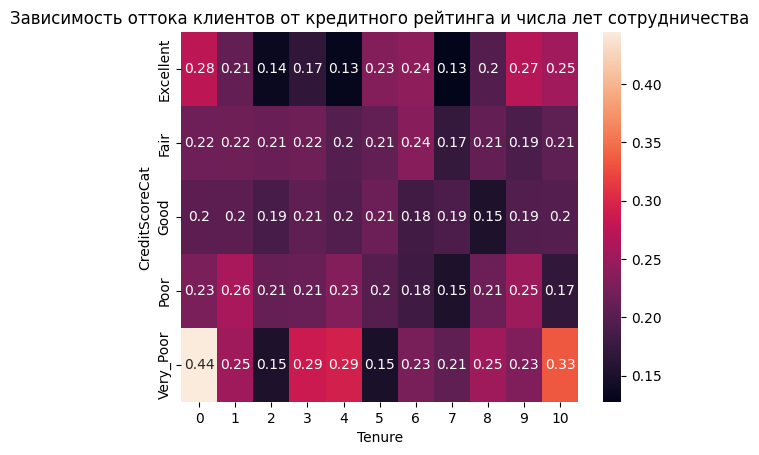

In [74]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

df_new['CreditScoreCat'] = df_new['CreditScore'].apply(get_credit_score_cat)
pivot = df_new.pivot_table(
        values='Exited',
        index='CreditScoreCat',
        columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, 
                 annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');